***CHE 4230 Homework 4***

UNSUPERVISED LEARNING 

Instructions: Perform PCA manually using numpy functions and then compare the results using the PCA package from scikit-learn.

In [ ]:
'''
First, make sure you have the following installed:

##################################################
pip install numpy
pip install matplotlib
pip install pandas
pip install scikit-learn
##################################################

'''

***1. Import needed python packages.***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

***2. Load the 'iris' dataset from scikit-learn. It is a popular dataset for classifying flower types based on sepal length, sepal width, petal length, and petal width.***

In [2]:
# Load the Iris dataset
iris = load_iris()
print(iris.DESCR)
X = iris.data
y = iris.target

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

***3. Standardize the features of the dataset.***

In [18]:
# Standardize the dataset
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

***4. Manually perform Principal Component Analysis (PCA) using numpy functions.***

**Step 1- Compute the covariance matrix**

~ use np.cov()

~ make sure the data inside of np.cov() is transposed (adding ".T")

~ Ex. (covariance_matrix = np.cov(X_standardized.T))

In [6]:
# Step 1: Find the covariance matrix

cov_matrix = np.cov(X_standardized.T)
print(cov_matrix)


[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


**Step 2- Compute the eigenvalues and eigenvectors of the covariance matrix**

~ use np.linalg.eig(cov_matrix)

In [8]:
# Step 2: Find the eigenvalues and eigenvectors of the covariance matrix

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigenvalues:', eigenvalues)
print('Eigenvectors:', eigenvectors)

Eigenvalues: [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors: [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


**Step 3- Sort the eigen values in descending order.**

~ np.argsort() sorts in ascending order, adding np.argsort(eigenvalues)[::-1] sorts in descending order

~ the eigen values represent the amount of variance captured by each principal component

~ each column of the eigen vectors corresponds to the eigen values. if you reorder the eigen values, you have to reorder the columns of the eigen vectors in the same way.

In [9]:
# Step 3: Sort eigenvalues and eigenvectors in descending order

''' Use this code to help sort your eigenvalues and eigenvectors. make sure that you have eigenvalues and eigenvectors defined. '''
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

print('Sorted Eigenvalues:', eigenvalues)
print('Sorted Eigenvectors:', eigenvectors)

Sorted Eigenvalues: [2.93808505 0.9201649  0.14774182 0.02085386]
Sorted Eigenvectors: [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


**Step 4- Transfrom the scaled data using the top two eigen vectors**

~ Hint: X_pca_manual = X_standardized @ eigenvectors[:, :2]

In [12]:
# Step 4: Transform the data to the new subspace

X_pca_manual = X_standardized @ eigenvectors[:, :2]
print(X_pca_manual)

[[-2.26470281 -0.4800266 ]
 [-2.08096115  0.67413356]
 [-2.36422905  0.34190802]
 [-2.29938422  0.59739451]
 [-2.38984217 -0.64683538]
 [-2.07563095 -1.48917752]
 [-2.44402884 -0.0476442 ]
 [-2.23284716 -0.22314807]
 [-2.33464048  1.11532768]
 [-2.18432817  0.46901356]
 [-2.1663101  -1.04369065]
 [-2.32613087 -0.13307834]
 [-2.2184509   0.72867617]
 [-2.6331007   0.96150673]
 [-2.1987406  -1.86005711]
 [-2.26221453 -2.68628449]
 [-2.2075877  -1.48360936]
 [-2.19034951 -0.48883832]
 [-1.898572   -1.40501879]
 [-2.34336905 -1.12784938]
 [-1.914323   -0.40885571]
 [-2.20701284 -0.92412143]
 [-2.7743447  -0.45834367]
 [-1.81866953 -0.08555853]
 [-2.22716331 -0.13725446]
 [-1.95184633  0.62561859]
 [-2.05115137 -0.24216355]
 [-2.16857717 -0.52714953]
 [-2.13956345 -0.31321781]
 [-2.26526149  0.3377319 ]
 [-2.14012214  0.50454069]
 [-1.83159477 -0.42369507]
 [-2.61494794 -1.79357586]
 [-2.44617739 -2.15072788]
 [-2.10997488  0.46020184]
 [-2.2078089   0.2061074 ]
 [-2.04514621 -0.66155811]
 

***4. Perform PCA using scikit-learn package***

In [20]:
# Perform PCA using scikit-learn

# First, create a PCA object --> pca = PCA(n_components=2), then use pca.fit_transform() to transform the data

pca = PCA(n_components=2)
X_pca_sklearn = pca.fit_transform(X_standardized)

***5. Compare the results of the manaul PCA vs the scikit-learn PCA***

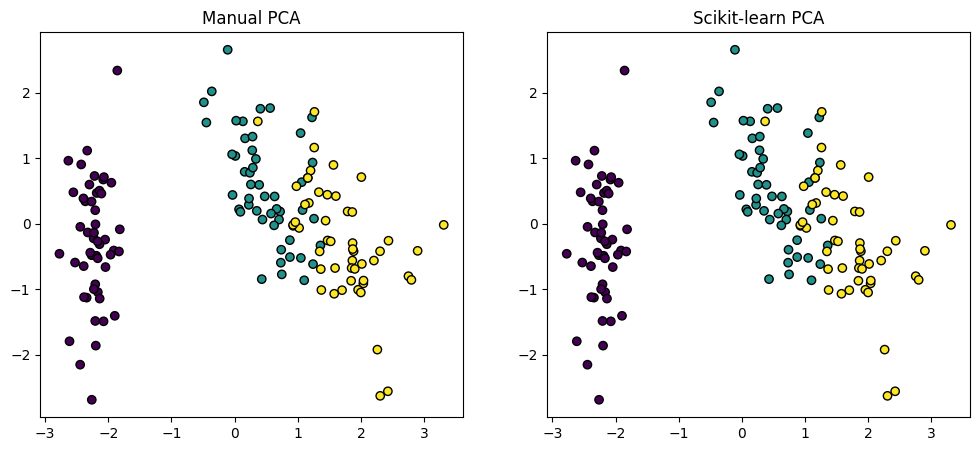

In [24]:
# Plot for comparing manual and scikit-learn PCA

'''you can use this code to help make your plots. make sure you have X_pca_manual and X_pca_sklearn defined. '''

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(X_pca_manual[:, 0], X_pca_manual[:, 1], c=y, cmap='viridis', edgecolor='k')
ax[0].set_title('Manual PCA')
ax[1].scatter(X_pca_sklearn[:, 0], -X_pca_sklearn[:, 1], c=y, cmap='viridis', edgecolor='k')
ax[1].set_title('Scikit-learn PCA')
plt.show()

*If you have any questions, reach out to Kyle. I hope y'all found this part of the course interesting!*

**When turing in the notebooks on Moodle, please name the notebook your name.**